In [1]:
from IPython.display import clear_output 
import cv2
!pip3 install google-colab
from google.colab.patches import cv2_imshow
clear_output()

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!pip install -r ./yolov5/requirements.txt
clear_output()

In [ ]:

!touch ./yolov5/data/custom.yaml

"""
train: ../weapon_data/images/train/ 
val:  ../weapon_data/images/val/
test: ../weapon_data/images/test/
# number of classes,
nc: 1,
# class names,
names: ["weapon"]
"""

my_file = open('/kaggle/working/yolov5/data/custom.yaml','w+')
my_file.write('train: ../weapon_data/images/train/ \nval:  ../weapon_data/images/val/ \ntest: ../weapon_data/images/test/ \n# number of classes \nnc: 1 \n# class names \nnames: ["weapon"]')

166

In [ ]:
my_file.readlines()

['train: ../weapon_data/images/train/ \n',
 'val:  ../weapon_data/images/val/ \n',
 'test: ../weapon_data/images/test/ \n',
 '# number of classes \n',
 'nc: 1 \n',
 '# class names \n',
 'names: ["weapon"]']

In [ ]:
!pip install imageio
!pip install imutils
clear_output()

In [ ]:
import random
from PIL import Image, ImageDraw
import numpy as np
from numpy import int64
import matplotlib.pyplot as plt
import os
import glob
from imageio import imread
import cv2
from google.colab.patches import cv2_imshow
import imutils
import json

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

import torch
from IPython.display import Image
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.copy(f, destination_folder)
        except:
            print(f)
            assert False

In [ ]:
!mkdir ./yolov5/weapon_data
!mkdir ./yolov5/weapon_data/images ./yolov5/weapon_data/labels
!mkdir ./yolov5/weapon_data/images/train ./yolov5/weapon_data/images/val ./yolov5/weapon_data/images/test ./yolov5/weapon_data/labels/train ./yolov5/weapon_data/labels/val ./yolov5/weapon_data/labels/test

In [ ]:
originTrainImgs = "../input/weapon-data/weapon_data/images/train/"
originTestImgs = "../input/weapon-data/weapon_data/images/test/"
originValImgs = "../input/weapon-data/weapon_data/images/val/"

originTrainLabls = "../input/weapon-data/weapon_data/labels/train/"
originTestLabls = "../input/weapon-data/weapon_data/labels/test/"
originValLabls = "../input/weapon-data/weapon_data/labels/val/"

images = []
train_images = []
test_images = []
val_images = []

for fl in sorted(os.listdir(originTrainImgs)):
    images.append(originTrainImgs+fl)
    train_images.append(originTrainImgs+fl)
move_files_to_folder(train_images, "./yolov5/weapon_data/images/train/")    
for fl in sorted(os.listdir(originTestImgs)):
    images.append(originTestImgs+fl)
    test_images.append(originTestImgs+fl)
move_files_to_folder(test_images, "./yolov5/weapon_data/images/test/")  
for fl in sorted(os.listdir(originValImgs)):
    images.append(originValImgs+fl)
    val_images.append(originValImgs+fl)
move_files_to_folder(val_images, "./yolov5/weapon_data/images/val/")

annotations = []
train_annotations = []
test_annotations = []
val_annotations = []

for fl in sorted(os.listdir(originTrainLabls)):
    annotations.append(originTrainLabls+fl)
    train_annotations.append(originTrainLabls+fl)
move_files_to_folder(train_annotations, "./yolov5/weapon_data/labels/train/")    
for fl in sorted(os.listdir(originTestLabls)):
    annotations.append(originTestLabls+fl)
    test_annotations.append(originTestLabls+fl)
move_files_to_folder(test_annotations, "./yolov5/weapon_data/labels/test/")  
for fl in sorted(os.listdir(originValLabls)):
    annotations.append(originValLabls+fl)
    val_annotations.append(originValLabls+fl)
move_files_to_folder(val_annotations, "./yolov5/weapon_data/labels/val/")  
    


In [ ]:
!ls ./yolov5/weapon_data/images/test/
print('--------------')
!ls ./yolov5/weapon_data/labels/test/

im16.jpg  im31.jpg  im45.jpg  im62.jpg	im66.jpg
im2.jpg   im33.jpg  im61.jpg  im64.jpg	im9.jpg
--------------
im16.txt  im31.txt  im45.txt  im62.txt	im66.txt
im2.txt   im33.txt  im61.txt  im64.txt	im9.txt


In [ ]:

labelsTrain = "./yolov5/weapon_data/labels/train/"
labelsTest = "./yolov5/weapon_data/labels/test/"
labelsVal = "./yolov5/weapon_data/labels/val/"

for fl in sorted(os.listdir(labelsTrain)):
    os.remove(labelsTrain+fl)

for fl in sorted(os.listdir(labelsTest)):
    os.remove(labelsTest+fl)

for fl in sorted(os.listdir(labelsVal)):
    os.remove(labelsVal+fl)


imgTrain = "./yolov5/weapon_data/images/train/"
imgTest = "./yolov5/weapon_data/images/test/"
imgVal = "./yolov5/weapon_data/images/val/"

for fl in sorted(os.listdir(imgTrain)):
    os.remove(imgTrain+fl)

for fl in sorted(os.listdir(imgTest)):
    os.remove(imgTest+fl)

for fl in sorted(os.listdir(imgVal)):
    os.remove(imgVal+fl)

In [ ]:
def augmentFilesInDir(pathToDir):

    for fl in sorted(os.listdir(pathToDir)):

augmentFilesInDir(labelsTrain)
augmentFilesInDir(imgTrain)

augmentFilesInDir(labelsTest)
augmentFilesInDir(imgTest)

augmentFilesInDir(labelsVal)
augmentFilesInDir(imgVal)

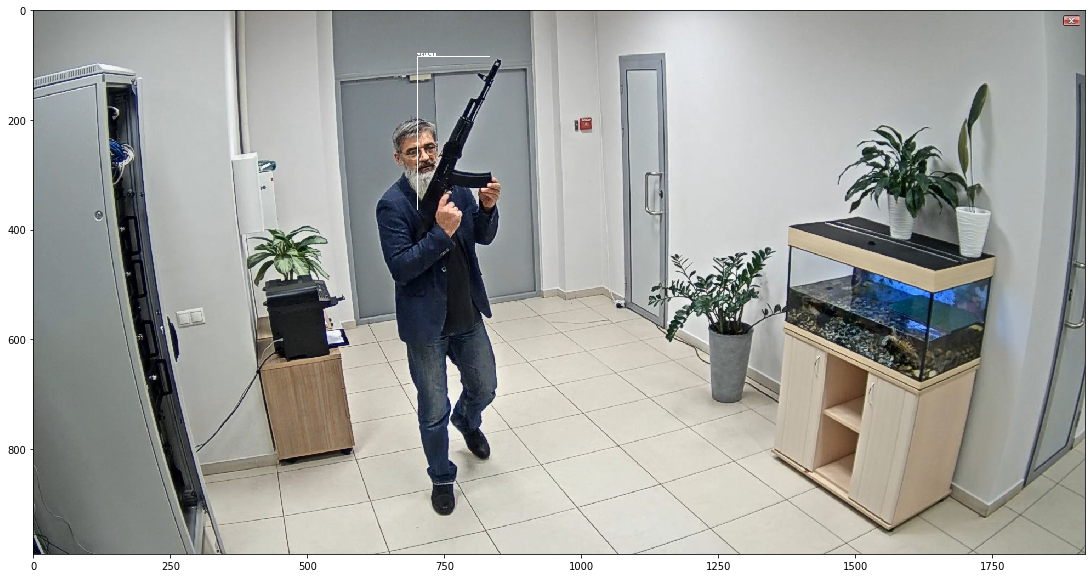

In [ ]:

class_name_to_id_mapping = {"weapon": 0,}

random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)

    w, h = image.size

    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]

    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.figure(figsize = (30,10))
    plt.imshow(np.array(image), interpolation='nearest')
    plt.show()

annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

image = Image.open(image_file)

plot_bounding_box(image, annotation_list)

In [ ]:
%cd ./yolov5

/kaggle/working/yolov5


In [ ]:
!python train.py --img 640 --cfg yolov5s.yaml --hyp hyp.scratch-med.yaml --batch 16 --epochs 50 --data ./data/custom.yaml --weights yolov5s.pt --workers 24 --name yolo_weapon_det

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=./data/custom.yaml, hyp=hyp.scratch-med.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_weapon_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.

In [ ]:
!python detect.py --source ./weapon_data/images/test/ --weights runs/train/yolo_weapon_det/weights/best.pt --conf 0.25 --name yolo_weapon_det

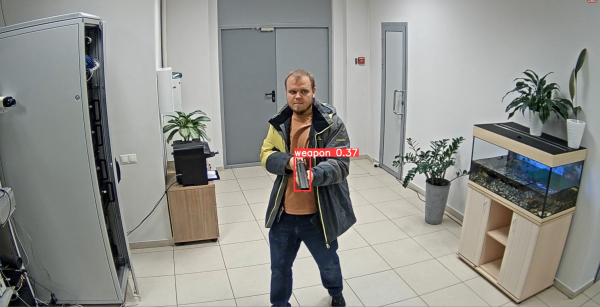

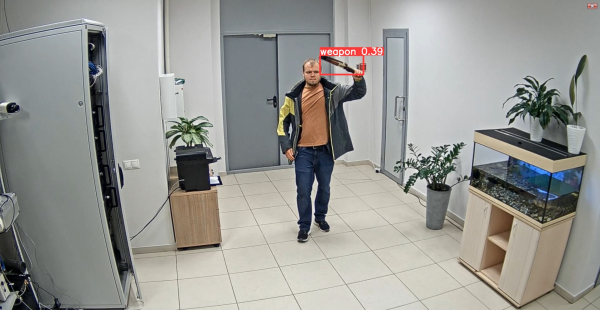

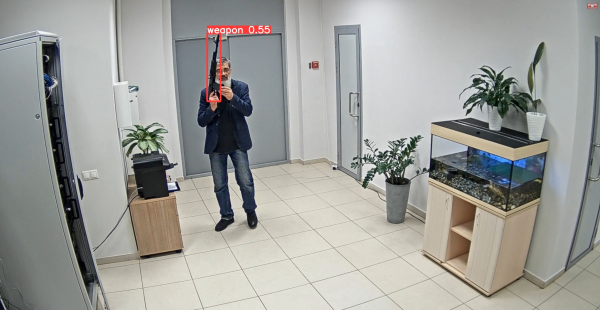

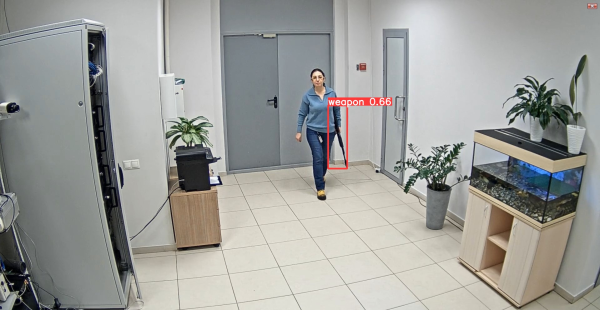

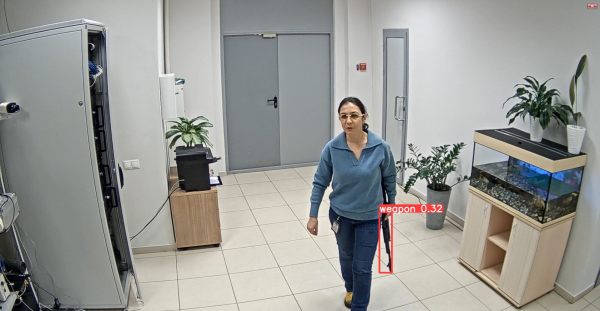

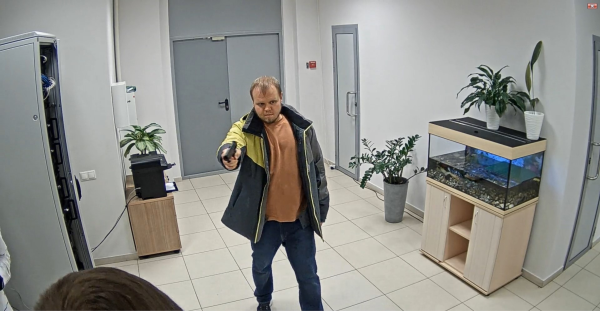

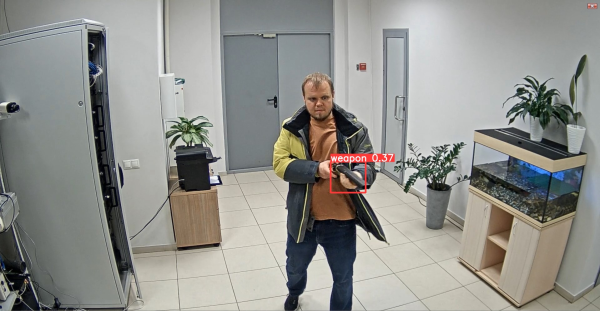

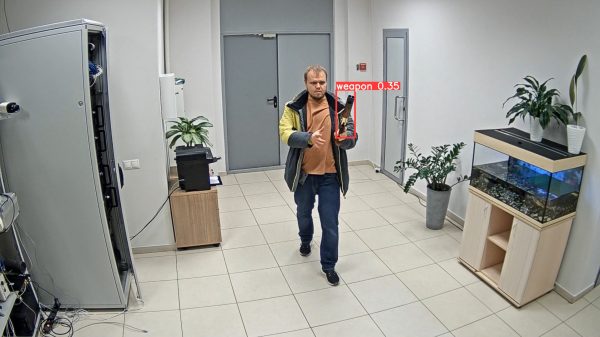

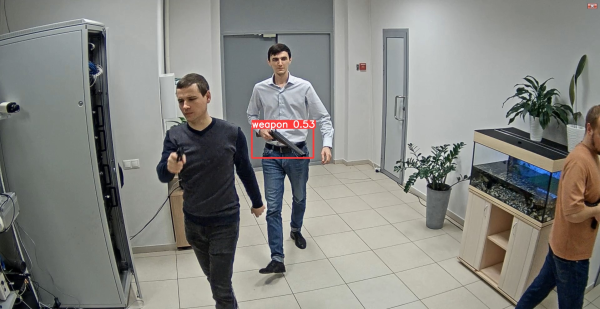

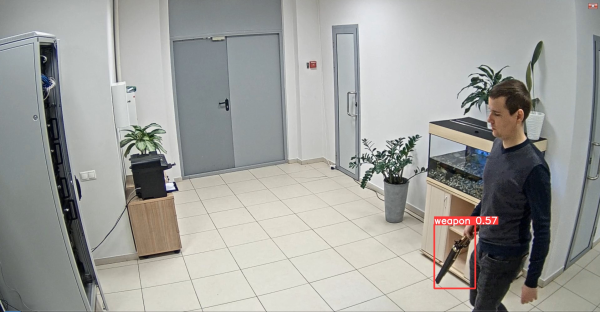

In [ ]:

detections_dir = "./runs/detect/yolo_weapon_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

for fl in os.listdir(detections_dir):
  img = cv2.imread(detections_dir+fl)
  img = imutils.resize(img, width=600)
  cv2_imshow(img)

In [ ]:
print('test results:')
!python val.py --weights ./runs/train/yolo_weapon_det/weights/best.pt --data custom.yaml --task test --name yolo_weapon_det_test

test results:
val: data=/kaggle/working/yolov5/data/custom.yaml, weights=['./runs/train/yolo_weapon_det/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_weapon_det_test, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-215-g575055c Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/kaggle/working/yolov5/weapon_data/labels/test' images and label
test: New cache created: /kaggle/working/yolov5/weapon_data/labels/test.cache
                 Class     Images  Instances          P          R      mAP50   
                   all         10         11    0.00333      0.909      0.102     0.0311
Speed: 0.1ms pre-process, 5.3ms inference, 3.5ms NMS per i

In [ ]:
name = 'Nadhif Musyaffa Khairullah'

acc = '0.102'
print(name, ', mAP50:', acc)